In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

1563/1563 [==============================] - 204s 130ms/step - loss: 0.0907 - accuracy: 0.9698


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 11s 34ms/step - loss: 1.8702 - accuracy: 0.6959


[1.8701810836791992, 0.695900022983551]

In [ ]:
y_pred = cnn.predict(X_test)
index = np.argmax(y_pred[3])
y_test[index]

array([3], dtype=uint8)

'airplane'

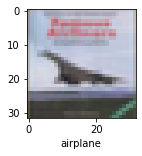

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(X_test[3])
plt.xlabel(classes[y_test[3][0]])
classes[index]

---


**Improving Test Accuracy**

---




In [ ]:
from tensorflow import keras
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 32, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
cnn = models.Sequential([
    data_augmentation,

    layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #Dropout works by randomly disabling neurons and their corresponding connections. 
    #This prevents the network from relying too much on single neurons and forces all neurons to learn to generalize better
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=30)

Epoch 1/30
1563/1563 [==============================] - 51s 32ms/step - loss: 1.3929 - accuracy: 0.5028
Epoch 2/30
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3051 - accuracy: 0.5364
Epoch 3/30
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2498 - accuracy: 0.5552
Epoch 4/30
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2017 - accuracy: 0.5751
Epoch 5/30
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1720 - accuracy: 0.5853
Epoch 6/30
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1446 - accuracy: 0.5984
Epoch 7/30
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1228 - accuracy: 0.6027
Epoch 8/30
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1001 - accuracy: 0.6114
Epoch 9/30
1563/1563 [==============================] - 51s 32ms/step - loss: 1.0840 - accuracy: 0.6154
Epoch 10/30
1563/1563 [==============================] - 51s 33m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9552 - accuracy: 0.6750


[0.9552070498466492, 0.675000011920929]

---


**Transfer learning**

---




In [16]:
X = []
Y = []
from skimage.transform import resize
for i in range(0,1000):
  img_resized = resize(X_train[i], (224, 224))
  X.append(img_resized)
  Y.append(y_train[i])


In [17]:
X = np.array(X)
Y = np.array(Y)
X.shape
Y.shape

(1000, 1)

In [18]:
import tensorflow_hub as hub
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [19]:
model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(10,activation='softmax')
])

In [20]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [22]:
model.fit(X,Y,epochs=10)

Epoch 1/10
32/32 [==============================] - 30s 769ms/step - loss: 1.9065 - accuracy: 0.3650
Epoch 2/10
32/32 [==============================] - 26s 805ms/step - loss: 0.9410 - accuracy: 0.7050
Epoch 3/10
32/32 [==============================] - 25s 790ms/step - loss: 0.6625 - accuracy: 0.7880
Epoch 4/10
32/32 [==============================] - 26s 804ms/step - loss: 0.5450 - accuracy: 0.8380
Epoch 5/10
32/32 [==============================] - 29s 907ms/step - loss: 0.4507 - accuracy: 0.8760
Epoch 6/10
32/32 [==============================] - 26s 798ms/step - loss: 0.3940 - accuracy: 0.9040
Epoch 7/10
32/32 [==============================] - 25s 790ms/step - loss: 0.3338 - accuracy: 0.9250
Epoch 8/10
32/32 [==============================] - 26s 823ms/step - loss: 0.2940 - accuracy: 0.9300
Epoch 9/10
32/32 [==============================] - 25s 785ms/step - loss: 0.2689 - accuracy: 0.9440
Epoch 10/10
32/32 [==============================] - 25s 779ms/step - loss: 0.2370 - accura

In [24]:
testX = []
testY = []
from skimage.transform import resize
for i in range(0,1000):
  img_resized = resize(X_test[i], (224, 224))
  testX.append(img_resized)
  testY.append(y_test[i])


In [25]:
testX = np.array(testX)
testY = np.array(testY)
testX.shape
testY.shape

(1000, 1)

In [26]:
model.evaluate(testX,testY)

32/32 [==============================] - 26s 784ms/step - loss: 0.6856 - accuracy: 0.7600


[0.6855693459510803, 0.7599999904632568]